In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()

# Generate the data
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1['target'] = iris.target
print(df1.head())
print(df1.info())

# Converted to a binary classification problem 
df1['target'] = df1['target'].replace({2: 1})
print(df1.tail())

# Split into training and testing sets
X = df1.drop('target', axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float

AUC for training set: 1.000
AUC for testing set: 1.000


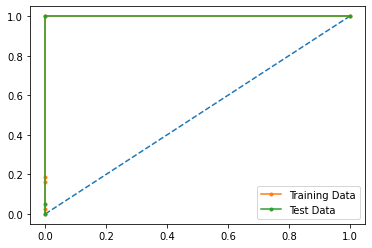

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt

# Fit the LDA model
clf = LinearDiscriminantAnalysis(n_components=1)
model=clf.fit(X_train,y_train)

# Prediction
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Probability Prediction
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

auc_train = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
auc_test = metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print('AUC for training set: %.3f' % auc_train)
print('AUC for testing set: %.3f' % auc_test)

# ROC curve
fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, marker='.', label = 'Training Data')
plt.plot(fpr_test, tpr_test, marker='.', label = 'Test Data')
plt.legend(loc=0)
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

# Generate the data
df2 = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df2['target'] = cancer.target
print(df2.head())

# Split into training and testing sets
X = df2.drop('target', axis=1)
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

The best k: 9


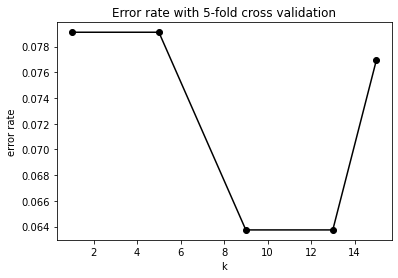

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross validation with different k
ks = [1, 5, 9, 13, 15]
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
plt.xlabel('k')
plt.ylabel('error rate')
plt.title('Error rate with 5-fold cross validation')

# The best k
min_k = ks[np.argmin(scores)]
print('The best k:', min_k)

In [5]:
# A classifier with best k
knn = KNN(n_neighbors = min_k)
knn.fit(X_train, y_train)

# Test error
err = 1 - knn.score(X_test, y_test)
print('Error rate in testing set with best k:', err)

Error rate in testing set with best k: 0.03508771929824561
